In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
dataset=pd.read_csv('/content/drive/My Drive/heart_data/heart.csv')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['sex'],prefix='sex_')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['cp'],prefix='Cp_type_')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['fbs'],prefix='fbs_')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['exang'],prefix='exang')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['slope'],prefix='slope')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['ca'],prefix='ca_')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['thal'],prefix='thal_')],axis=1)

In [ ]:
dataset.head()

,age,trestbps,chol,restecg,thalach,oldpeak,target,female,male,Cp_type__0,Cp_type__1,Cp_type__2,Cp_type__3,fbs_false,fbs_true,exang_no,exang_yes,slope_0,slope_1,slope_2,ca__0,ca__1,ca__2,ca__3,ca__4,thal__0,thal__1,thal__2,thal__3
0,52,125,212,1,168,1.0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,53,140,203,0,155,3.1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,70,145,174,1,125,2.6,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,61,148,203,1,161,0.0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,62,138,294,1,106,1.9,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [ ]:
dataset=dataset.drop(['sex'],axis=1)
dataset=dataset.drop(['cp'],axis=1)
dataset=dataset.drop(['fbs'],axis=1)
dataset=dataset.drop(['exang'],axis=1)
dataset=dataset.drop(['ca'],axis=1)
dataset=dataset.drop(['thal'],axis=1)
dataset=dataset.drop(['slope'],axis=1)


In [ ]:
dataset=dataset.rename(columns={'sex__0':'female','sex__1':'male','fbs__0':'fbs_false','fbs__1':'fbs_true','exang_0':'exang_no','exang_1':'exang_yes'})

In [ ]:
dataset

,age,trestbps,chol,restecg,thalach,oldpeak,target,female,male,Cp_type__0,Cp_type__1,Cp_type__2,Cp_type__3,fbs_false,fbs_true,exang_no,exang_yes,slope_0,slope_1,slope_2,ca__0,ca__1,ca__2,ca__3,ca__4,thal__0,thal__1,thal__2,thal__3
0,52,125,212,1,168,1.0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,53,140,203,0,155,3.1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,70,145,174,1,125,2.6,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,61,148,203,1,161,0.0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,62,138,294,1,106,1.9,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,1,164,0.0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
1021,60,125,258,0,141,2.8,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
1022,47,110,275,0,118,1.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
1023,50,110,254,0,159,0.0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

In [ ]:
train_stats=train_dataset.describe()

In [ ]:
train_stats

,age,trestbps,chol,restecg,thalach,oldpeak,target,female,male,Cp_type__0,Cp_type__1,Cp_type__2,Cp_type__3,fbs_false,fbs_true,exang_no,exang_yes,slope_0,slope_1,slope_2,ca__0,ca__1,ca__2,ca__3,ca__4,thal__0,thal__1,thal__2,thal__3
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,54.285366,131.569512,245.169512,0.545122,149.791463,1.083902,0.519512,0.295122,0.704878,0.486585,0.163415,0.278049,0.071951,0.850000,0.150000,0.665854,0.334146,0.079268,0.459756,0.460976,0.568293,0.217073,0.128049,0.068293,0.018293,0.006098,0.065854,0.513415,0.414634
std,9.106427,17.669640,51.032124,0.524527,22.710993,1.193484,0.499924,0.456376,0.456376,0.500125,0.369969,0.448311,0.258565,0.357289,0.357289,0.471979,0.471979,0.270322,0.498682,0.498779,0.495616,0.412504,0.334348,0.252401,0.134089,0.077896,0.248177,0.500125,0.492959
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,209.750000,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,239.000000,1.000000,152.000000,0.800000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,140.000000,275.000000,1.000000,167.000000,1.800000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,2.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_stats.pop('target')
train_stats=train_stats.transpose()

In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
age,820.0,54.285366,9.106427,29.0,47.00,55.0,61.0,77.0
trestbps,820.0,131.569512,17.669640,94.0,120.00,130.0,140.0,200.0
chol,820.0,245.169512,51.032124,126.0,209.75,239.0,275.0,564.0
restecg,820.0,0.545122,0.524527,0.0,0.00,1.0,1.0,2.0
thalach,820.0,149.791463,22.710993,71.0,134.00,152.0,167.0,202.0
oldpeak,820.0,1.083902,1.193484,0.0,0.00,0.8,1.8,6.2
female,820.0,0.295122,0.456376,0.0,0.00,0.0,1.0,1.0
male,820.0,0.704878,0.456376,0.0,0.00,1.0,1.0,1.0
Cp_type__0,820.0,0.486585,0.500125,0.0,0.00,0.0,1.0,1.0
Cp_type__1,820.0,0.163415,0.369969,0.0,0.00,0.0,0.0,1.0


In [ ]:
train_labels=train_dataset.pop('target')
test_labels=test_dataset.pop('target')

In [ ]:
def normalize(data,attr):
     return (data-train_stats['mean'][attr])/train_stats['std'][attr]

In [ ]:
# train_dataset=normalize(train_dataset)
# test_dataset=normalize(test_dataset)

train_dataset['trestbps']=normalize(train_dataset,'trestbps')
test_dataset['trestbps']=normalize(test_dataset,'trestbps')
train_dataset['age']=normalize(train_dataset,'age')
test_dataset['age']=normalize(test_dataset,'age')
train_dataset['chol']=normalize(train_dataset,'chol')
test_dataset['chol']=normalize(test_dataset,'chol')
train_dataset['thalach']=normalize(train_dataset,'thalach')
test_dataset['thalach']=normalize(test_dataset,'thalach')
train_dataset['oldpeak']=normalize(train_dataset,'oldpeak')
test_dataset['oldpeak']=normalize(test_dataset,'oldpeak')

In [ ]:
train_dataset

,age,trestbps,chol,restecg,thalach,oldpeak,female,male,Cp_type__0,Cp_type__1,Cp_type__2,Cp_type__3,fbs_false,fbs_true,exang_no,exang_yes,slope_0,slope_1,slope_2,ca__0,ca__1,ca__2,ca__3,ca__4,thal__0,thal__1,thal__2,thal__3
807,-1.129462,-4.955931,-4.826352,1,-6.645281,-1.854540,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
27,0.407913,-4.163611,-4.796226,0,-6.577588,-0.566400,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0
77,0.956976,-3.880640,-4.785467,0,-6.553412,-0.106349,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
406,0.407913,-4.163611,-4.796226,0,-6.577588,-0.566400,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0
886,0.737351,-3.993829,-4.789770,1,-6.563082,-0.290369,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1.396226,-3.654263,-4.776859,0,-6.534071,0.261691,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
25,0.737351,-3.993829,-4.789770,0,-6.563082,-0.290369,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
110,-1.129462,-4.955931,-4.826352,0,-6.645281,-1.854540,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
149,-1.678525,-5.238902,-4.837111,0,-6.669457,-2.314591,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
model=tf.keras.models.Sequential([
                             tf.keras.layers.Dense(64,activation='relu',input_shape=[len(train_dataset.keys())]),
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(32,activation='relu'),
                         
                                   
                               
                                  tf.keras.layers.Dense(1,activation='sigmoid')     
])



model.compile(loss='mse',
                optimizer="sgd",metrics=['acc'])

In [ ]:
history=model.fit(train_dataset,train_labels,epochs=200)

Epoch 1/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2566 - acc: 0.4927
Epoch 2/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2431 - acc: 0.6134
Epoch 3/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2347 - acc: 0.6427
Epoch 4/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2258 - acc: 0.7049
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2177 - acc: 0.7317
Epoch 6/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2102 - acc: 0.7488
Epoch 7/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2031 - acc: 0.7524
Epoch 8/200
26/26 [==============================] - 0s 3ms/step - loss: 0.1959 - acc: 0.7720
Epoch 9/200
26/26 [==============================] - 0s 3ms/step - loss: 0.1888 - acc: 0.7878
Epoch 10/200
26/26 [==============================] - 0s 3ms/step - loss: 0.1807 - acc: 0.8037
Epoch 11/200
26/26 [==============================] - 0s 3m

In [ ]:
# test_data=np.array([28,33.00,3,0,1,1,0,0,0,1,0])
test_predict=model.predict(test_dataset,batch_size=1).flatten()

In [ ]:
print(test_predict)

In [ ]:
print(test_dataset)

In [ ]:
test_data=np.array([28,33.00,3,0,1,1,0,0,0,1,0])
test_predict1=model.predict(test_dataset)
print(test_predict1)

[[0.01798344]
 [0.05734803]
 [0.9842874 ]
 [0.99062634]
 [0.10418388]
 [0.01292148]
 [0.5140939 ]
 [0.6407952 ]
 [0.94253016]
 [0.43457454]
 [0.02002296]
 [0.07040401]
 [0.80019224]
 [0.7196636 ]
 [0.05165539]
 [0.02705964]
 [0.09927896]
 [0.949138  ]
 [0.99101526]
 [0.9842874 ]
 [0.43020162]
 [0.94409275]
 [0.94770736]
 [0.49629974]
 [0.14430058]
 [0.9503702 ]
 [0.09017036]
 [0.958422  ]
 [0.93273634]
 [0.9484099 ]
 [0.98502445]
 [0.99146724]
 [0.9578069 ]
 [0.9694642 ]
 [0.39510757]
 [0.56334716]
 [0.13535452]
 [0.899633  ]
 [0.01215015]
 [0.02679765]
 [0.0213308 ]
 [0.01672577]
 [0.98330855]
 [0.9581574 ]
 [0.802118  ]
 [0.8855828 ]
 [0.9694642 ]
 [0.6391286 ]
 [0.03486659]
 [0.80919975]
 [0.7302439 ]
 [0.9417031 ]
 [0.97347087]
 [0.9480097 ]
 [0.8823744 ]
 [0.9835691 ]
 [0.25660172]
 [0.93166745]
 [0.02172738]
 [0.04334645]
 [0.95774406]
 [0.90186983]
 [0.96080846]
 [0.9888151 ]
 [0.00919574]
 [0.8152489 ]
 [0.61423   ]
 [0.01180646]
 [0.9590073 ]
 [0.5620008 ]
 [0.9899013 ]
 [0.03

In [ ]:
model.evaluate(test_dataset,test_labels)

7/7 [==============================] - 0s 2ms/step - loss: 0.1114 - acc: 0.8488


[0.11139407008886337, 0.8487805128097534]

In [ ]:
print(len(test_predict))

205


In [ ]:
print(len(test_labels))

205


In [ ]:
df = pd.DataFrame({'Actual': test_labels, 'Predicted': test_predict})
df1 = df.head(40)


In [ ]:
df1

,Actual,Predicted
9,0,0.017983
11,0,0.057348
19,1,0.984287
23,1,0.990626
28,0,0.104184
32,0,0.012921
36,1,0.514094
41,1,0.640795
42,0,0.942530
43,0,0.434574


In [ ]:
df.loc[df['Predicted']>=0.5,'Predicted_1']=1
df.loc[df['Predicted']<0.5,'Predicted_1']=0

In [ ]:
df1=df.head(40)

In [ ]:
print(df1)

     Actual  Predicted  Predicted_1
9         0   0.017983          0.0
11        0   0.057348          0.0
19        1   0.984287          1.0
23        1   0.990626          1.0
28        0   0.104184          0.0
32        0   0.012921          0.0
36        1   0.514094          1.0
41        1   0.640795          1.0
42        0   0.942530          1.0
43        0   0.434574          0.0
47        0   0.020023          0.0
53        0   0.070404          0.0
57        1   0.800192          1.0
58        0   0.719664          1.0
70        0   0.051655          0.0
72        0   0.027060          0.0
80        0   0.099279          0.0
82        0   0.949138          1.0
84        1   0.991015          1.0
86        1   0.984287          1.0
87        0   0.430202          0.0
91        1   0.944093          1.0
94        1   0.947707          1.0
95        1   0.496300          0.0
98        0   0.144301          0.0
99        1   0.950370          1.0
115       0   0.090170      

In [ ]:
df1=df1.drop('Predicted',axis=1)

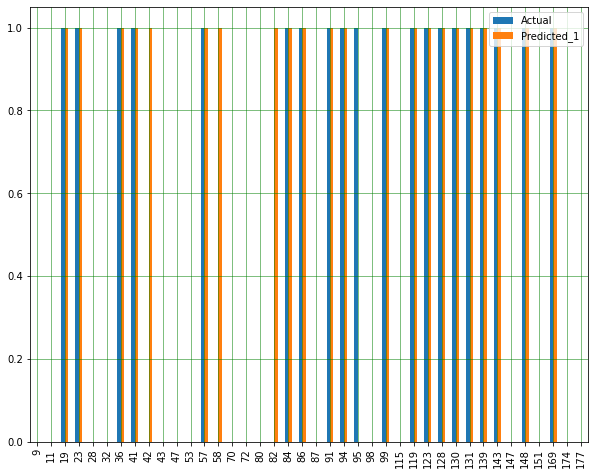

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

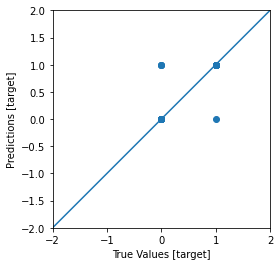

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(df1['Actual'], df1['Predicted_1'])
plt.xlabel('True Values [target]')
plt.ylabel('Predictions [target]')
lims = [-2,2]
plt.xlim(lims)
plt.ylim(lims)

_ = plt.plot(lims, lims)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=df1['Actual'], y_pred=df1['Predicted_1'])

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['Heart Problem','No Heart Problem']

Confusion matrix, without normalization
[[17  3]
 [ 1 19]]


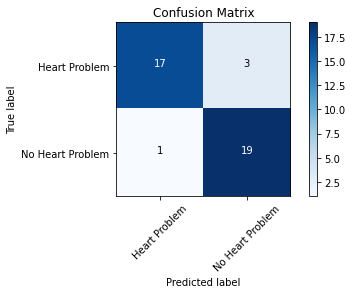

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
age=int(input('What is your age'))
sex=int(input('What is your Gender press 1 for male and 0 for female'))

while((sex != 1) and (sex != 0)):
  sex=int(input('Kindly give the coorect information\nWhat is your Gender press 1 for male and 0 for female'))
if (sex==0):
  female=1
  male=0
elif(sex==1):
  female=0
  male=1
CP=int(input('What is your chest pain type? type 0 to 3'))        
while(CP != 0 and CP != 1 and CP != 2 and CP != 3):
    CP=int(input('Kindly put correct info,What is your chest pain type? type 0 to 3'))
if(CP == 0):
  Cp_type__0=1
  Cp_type__1=0
  Cp_type__2=0
  Cp_type__3=0
elif(CP==1):
  Cp_type__0=0
  Cp_type__1=1
  Cp_type__2=0
  Cp_type__3=0
elif(CP == 2):
  Cp_type__0=0
  Cp_type__1=0
  Cp_type__2=1
  Cp_type__3=0
elif(CP==3):
  Cp_type__0=0
  Cp_type__1=0
  Cp_type__2=0
  Cp_type__3=1





BP=float(input("What is resting BP? in (mm Hg)?"))
Chol=float(input('What is your serum Cholestrol? in (mg/dl)'))
Sugar=int(input(' fasting blood sugar?(1 for true and 0 for false)'))    
while(Sugar != 0 and Sugar !=1):
  Sugar=int(input(' fasting blood sugar?(1 for true and 0 for false)')) 
if(Sugar==0):
  fbs_false=1
  fbs_true=0
elif(Sugar==1):
  fbs_false=0
  fbs_true=1

restecg=int(input("What is level of resting electrocardiographic result? press 0 for min or 25%\n press 1 for 50% or 75% \n press 2 for 100% or max"))  
thalach=float(input('What is maximum heart rate acheived?'))
exang=int(input('Is Exercise Induced Agina? press 1 for yes and 0 for No'))
while(exang!=0 and exang!=1):
  exang=int(input('Is Exercise Induced Agina? press 1 for yes and 0 for No'))
if(exang==0):
  exang_no=1
  exang_yes=0
elif(exang==1):
  exang_no=0
  exang_yes=1    
oldpeak=float(input('ST depression induced by exercise relative to rest'))
slope=int(input('the slope of the peak exercise ST segment (Value 0: upsloping, Value 1: flat, Value 2: downsloping)'))
while(slope!=0 and slope !=1 and slope !=2):
  slope=int(input('the slope of the peak exercise ST segment (Value 0: upsloping, Value 1: flat, Value 2: downsloping)'))
if(slope==0):
  slope_0=1
  slope_1=0
  slope_2=0
elif(slope==1):
  slope_0=0
  slope_1=1
  slope_2=0
elif(slope==2):
  slope_0=0
  slope_1=0
  slope_2=1  

ca=int(input('What is number of major vessels(0 to 3)'))
while(ca!=0 and ca!=1 and ca !=2 and ca !=3):
  ca=int(input('What is number of major vessels(0 to 3)'))
if(ca==0):
  ca_0=1
  ca_1=0
  ca_2=0
  ca_3=0
  ca_4=0
elif(ca==1):
  ca_0=0
  ca_1=1
  ca_2=0
  ca_3=0
  ca_4=0
elif(ca==2):
  ca_0=0
  ca_1=0
  ca_2=1
  ca_3=0
  ca_4=0
elif(ca==3):
  ca_0=0
  ca_1=0
  ca_2=0
  ca_3=1
  ca_4=0    
elif(ca==4):
  ca_0=0
  ca_1=0
  ca_2=0
  ca_3=0
  ca_4=1      

thal=int(input('Enter blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)'))
while(thal!=1 and thal != 2 and thal!=3):
  thal=int(input('Wrong Input!!!!\nEnter blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)'))
if(thal==1):
  thal_0=0
  thal_1=1
  thal_2=0
  thal_3=0
elif(thal==2):
  
  thal_0=0
  thal_1=0
  thal_2=1
  thal_3=0
elif(thal==3):
  
  thal_0=0
  thal_1=0
  thal_2=0
  thal_3=1      




    





What is your age34
What is your Gender press 1 for male and 0 for female1
What is your chest pain type? type 0 to 33
What is resting BP? in (mm Hg)?223
What is your serum Cholestrol? in (mg/dl)124
 fasting blood sugar?(1 for true and 0 for false)1
What is level of resting electrocardiographic result? press 0 for min or 25%
 press 1 for 50% or 75% 
 press 2 for 100% or max1
What is maximum heart rate acheived?124
Is Exercise Induced Agina? press 1 for yes and 0 for No1
ST depression induced by exercise relative to rest123
the slope of the peak exercise ST segment (Value 0: upsloping, Value 1: flat, Value 2: downsloping)1
What is number of major vessels(0 to 3)2
Enter blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)2


In [ ]:
ca_4=0
data={'age':[age],'trestbps':[BP],	'chol':[Chol],	'restecg':[restecg],	'thalach':[thalach],	'oldpeak':[oldpeak],	'slope_0':[slope_0],'slope_1':[slope_1]	,'slope_2':[slope_2], 'female':[female],	'male':[male],	'Cp_type__0':[Cp_type__0],	'Cp_type__1':[Cp_type__1],	'Cp_type__2':[Cp_type__2]	,'Cp_type__3':[Cp_type__3],	'fbs_false':[fbs_false],	'fbs_true':[fbs_true]	,'exang_no':[exang_no],	'exang_yes':[exang_yes],	'ca__0':[ca_0],	'ca__1':[ca_1],	'ca__2':[ca_2],	'ca__3':[ca_3],	'ca__4':[ca_4],	'thal__0':[thal_0],	'thal__1':[thal_1],	'thal__2':[thal_2],	'thal__3':[thal_3]}

In [ ]:
prediction_data=pd.DataFrame(data)

In [ ]:
prediction_data

,age,trestbps,chol,restecg,thalach,oldpeak,slope_0,slope_1,slope_2,female,male,Cp_type__0,Cp_type__1,Cp_type__2,Cp_type__3,fbs_false,fbs_true,exang_no,exang_yes,ca__0,ca__1,ca__2,ca__3,ca__4,thal__0,thal__1,thal__2,thal__3
0,34,223.0,124.0,1,124.0,123.0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
my_prediction=model.predict(prediction_data,batch_size=1).flatten()

In [ ]:
if(my_prediction[0]>=0.5):
  problem='Heart Problem'
else:
  problem='No Heart Problem'  
print(problem)  


Heart Problem


In [ ]:
model.save("HeartProblem.h5")